# Poker Game Data Processing

Notebook for processing raw poker results data and visualising in various charts, tables, and graphs.

## Setup and Data Processing

In [1]:
import pandas as pd
import csv
import os
import numpy as np
from datetime import datetime, timedelta

In [2]:
path = os.getcwd() + "/dataset.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,date,game_id,player,position,points
0,2020-05-22,1,Steve,1,10
1,2020-05-22,1,Antoni,2,7
2,2020-05-22,1,Lowes,3,5
3,2020-05-22,1,Mellick,4,4
4,2020-05-22,1,Sam,5,0


In [4]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [5]:
df = data.groupby(['date','game_id','player', 'position']).sum() \
         .groupby(level=2).cumsum().reset_index()

df = df.sort_values(by=['date','game_id','position']).reset_index()

df = df[['date', 'game_id', 'player', 'position', 'points']]

df.head()

,date,game_id,player,position,points
0,2020-05-22,1,Steve,1,10
1,2020-05-22,1,Antoni,2,7
2,2020-05-22,1,Lowes,3,5
3,2020-05-22,1,Mellick,4,4
4,2020-05-22,1,Sam,5,0


## Visualising Results

In [6]:
import matplotlib.pyplot as plt
from pandas.tseries import converter
converter.register() 
import seaborn as sns; sns.set()
%matplotlib inline

/Users/skarmaniolos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  This is separate from the ipykernel package so we can avoid doing imports until


#### Line Chart For Progress Over Time

In [7]:
# setting the figure size
plt.rcParams["figure.figsize"] = (26, 22)

# setting font family
plt.rcParams['font.family'] = 'Arial'

# plt.rcParams['lines.linewidth'] = 20
# plt.rcParams['lines.markersize'] = 1

# setting plot context
sns.set_context("poster")

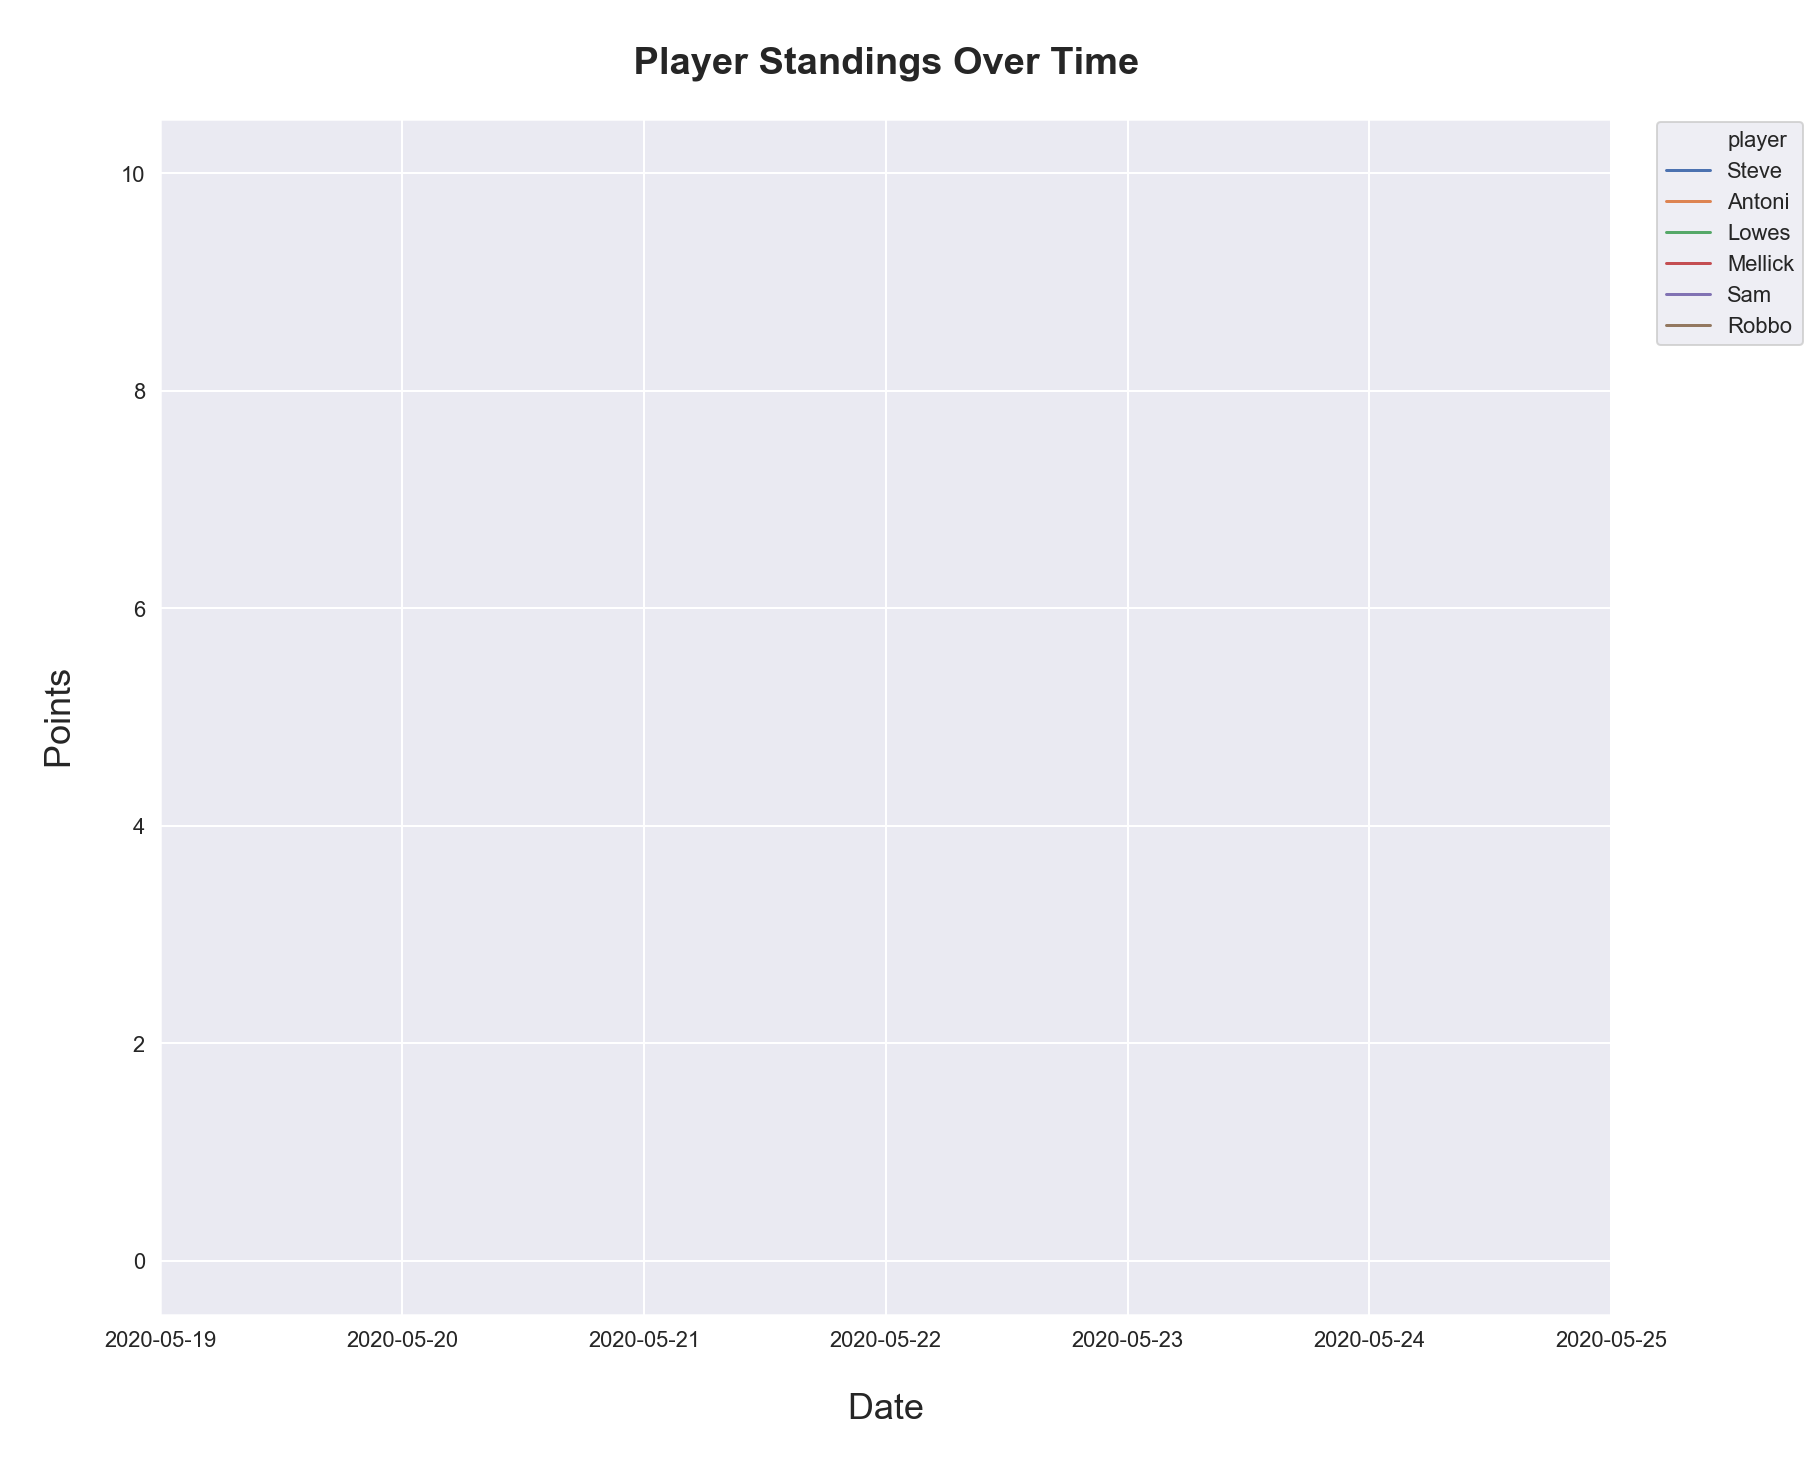

In [8]:
ax = sns.lineplot(x="date", 
                  y="points", 
                  hue="player", 
                  data=df,
                  dashes = True)

# adding labels to axis and title
ax.set_title('\n Player Standings Over Time \n', fontsize = 38, weight='bold')
ax.set_ylabel("\n Points \n", fontsize = 36)
ax.set_xlabel("\n Date \n", fontsize = 36)


min_date = min(df['date']) - timedelta(days=3)
max_date = max(df['date']) + timedelta(days=3)

plt.xlim(min_date, max_date)


# position legend to upper right of the plot and outside the x,y plane
ax.legend(loc='upper right', bbox_to_anchor=(1.14, 1.007), ncol=1)

plt.show()

#### Summary Table

In [30]:
players = df[['player']].set_index('player')
print(players)

Empty DataFrame
Columns: []
Index: [Steve, Antoni, Lowes, Mellick, Sam, Robbo]


In [31]:
# getting player points
points = df[['player', 'points']].set_index('player')
print(points)

         points
player         
Steve        10
Antoni        7
Lowes         5
Mellick       4
Sam           0
Robbo         0


In [32]:
# getting total games played
games_played = df[df['points'] > 0]
games_played = games_played["player"].value_counts()
games_played = games_played.to_frame(name='games_played')
print(games_played)

         games_played
Mellick             1
Antoni              1
Steve               1
Lowes               1


In [36]:
result = players.join(games_played)
result = result.join(points).fillna(0)

In [23]:
# joining dataframes
result = pd.merge(points, games_played, left_index=True, right_index=True)
result

,points,games_played
Steve,10,1
Antoni,7,1
Lowes,5,1
Mellick,4,1


In [37]:
# getting points per game
result['ppg'] = result['points'] / result['games_played']
result.head(10)

,games_played,points,ppg
player,,,
Steve,1.0,10,10.0
Antoni,1.0,7,7.0
Lowes,1.0,5,5.0
Mellick,1.0,4,4.0
Sam,0.0,0,NaN
Robbo,0.0,0,NaN


In [39]:
# getting count of wins
wins = df[df['position'] == 1]
wins = wins['player'].value_counts()
wins = wins.to_frame(name='wins')
print(wins)

       wins
Steve     1


In [40]:
final_result = result.join(wins)

In [43]:
table = final_result.fillna(0)
table['wins'] = table['wins'].astype('int64')
table['games_played'] = table['games_played'].astype('int64')
table = table[['games_played', 'points', 'ppg', 'wins']]

In [44]:
table

,games_played,points,ppg,wins
player,,,,
Steve,1,10,10.0,1
Antoni,1,7,7.0,0
Lowes,1,5,5.0,0
Mellick,1,4,4.0,0
Sam,0,0,0.0,0
Robbo,0,0,0.0,0
